In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
from pylab import mpl
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']

In [4]:
#切資料/評估工具
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [5]:
#方法集
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import lightgbm as lgb

In [6]:
data1=pd.read_csv(".\\hw2_data\\data1\\train.csv",header=None)

In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 765 entries, 0 to 764
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       531 non-null    float64
 1   1       545 non-null    float64
 2   2       547 non-null    float64
 3   3       540 non-null    float64
 4   4       546 non-null    float64
 5   5       526 non-null    float64
 6   6       516 non-null    float64
 7   7       528 non-null    float64
 8   8       765 non-null    float64
dtypes: float64(9)
memory usage: 53.9 KB


In [8]:
data1.describe()

,0,1,2,3,4,5,6,7,8
count,531.000000,545.000000,547.000000,540.000000,546.000000,526.000000,516.000000,528.000000,765.000000
mean,278.636723,73.485872,54.272761,181.377778,6.064103,971.024525,774.913372,47.710227,35.506967
std,104.520929,84.979766,63.748166,20.626869,5.880766,77.044012,76.439383,66.853243,16.508134
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,188.100000,0.000000,0.000000,164.900000,0.000000,932.000000,736.450000,7.000000,23.520000
50%,272.600000,22.000000,0.000000,185.000000,6.000000,967.000000,778.450000,28.000000,33.960000
75%,352.450000,145.000000,118.300000,192.000000,10.000000,1027.725000,824.250000,56.000000,45.080000
max,540.000000,359.400000,200.100000,228.000000,32.200000,1130.000000,992.600000,365.000000,82.600000


In [9]:
data1.head()

,0,1,2,3,4,5,6,7,8
0,NaN,0.0,0.0,NaN,2.5,1055.0,676.0,28.0,61.89
1,NaN,142.5,0.0,NaN,0.0,932.0,594.0,270.0,40.27
2,332.5,142.5,0.0,NaN,0.0,932.0,594.0,365.0,41.05
3,NaN,132.4,0.0,NaN,0.0,978.4,825.5,360.0,44.30
4,NaN,95.0,NaN,NaN,0.0,NaN,594.0,365.0,43.70


In [10]:
data1.nunique()

0    216
1    141
2    104
3    151
4     89
5    204
6    224
7     14
8    646
dtype: int64

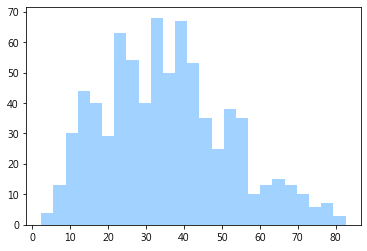

In [11]:
plt.hist(data1.iloc[:,-1],bins=25,color="#A2D2FF")
plt.show()

<AxesSubplot:>

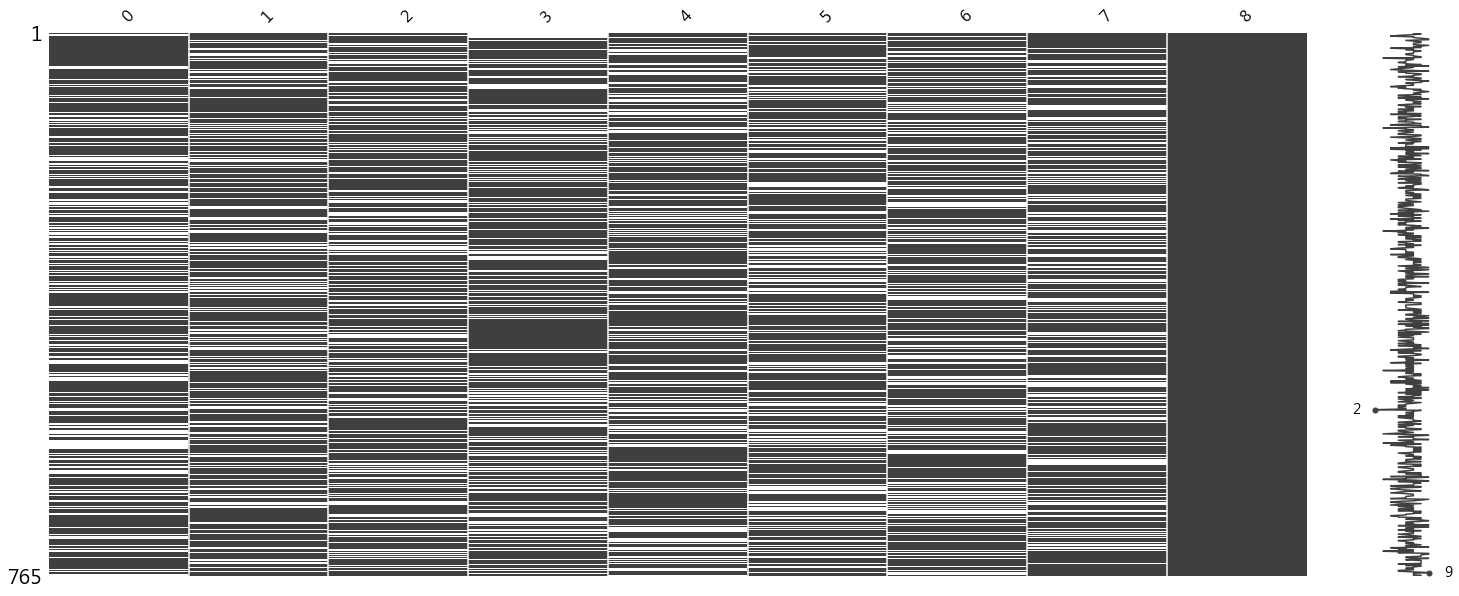

In [12]:
import missingno as msno
%matplotlib inline
msno.matrix(data1)

<AxesSubplot:>

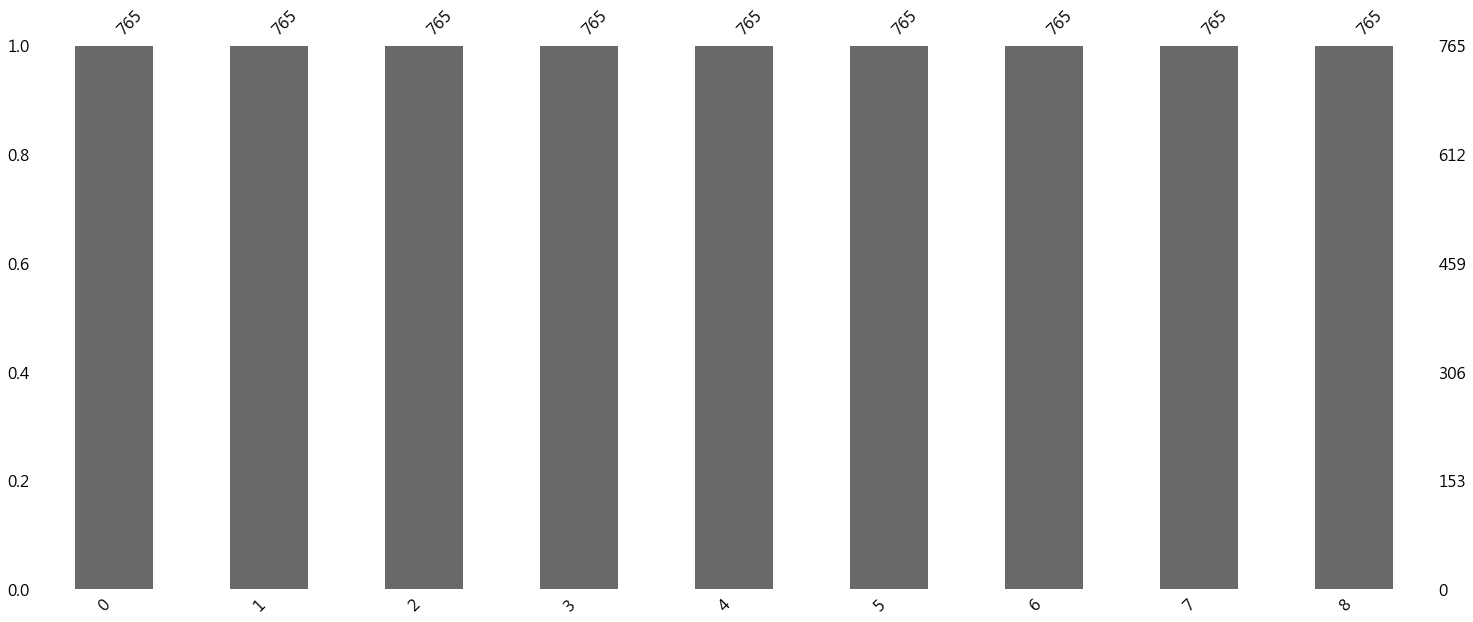

In [12]:
msno.bar(data1)

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\seaborn\matrix.py:301: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\seaborn\matrix.py:301: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


<AxesSubplot:>

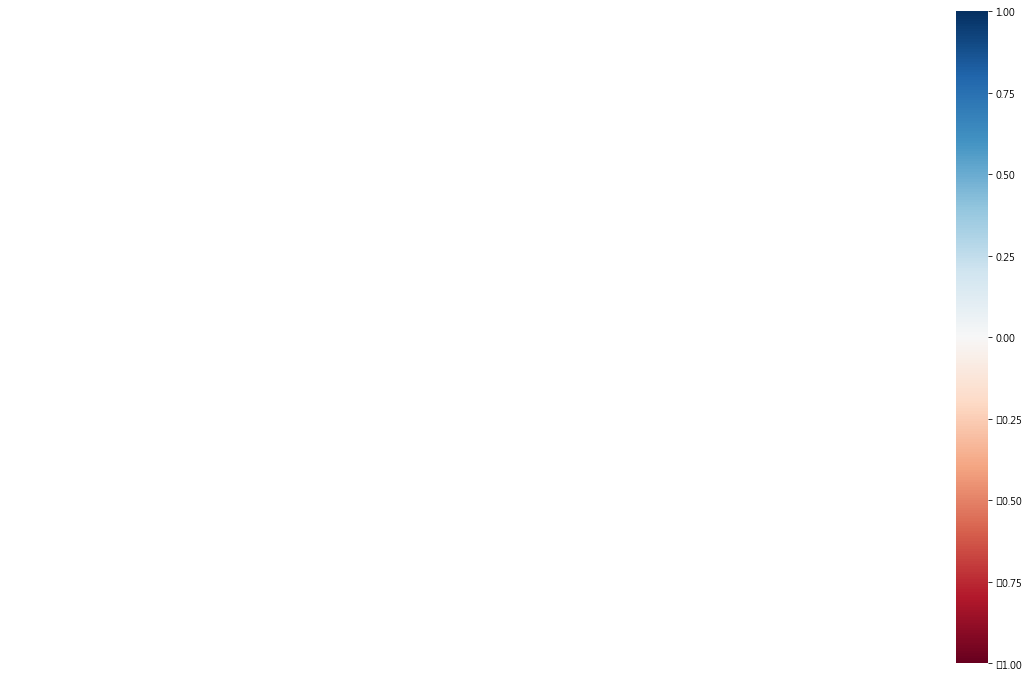

In [13]:
msno.heatmap(data1)

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\scipy\cluster\hierarchy.py:2844: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim([dvw, 0])


<AxesSubplot:>

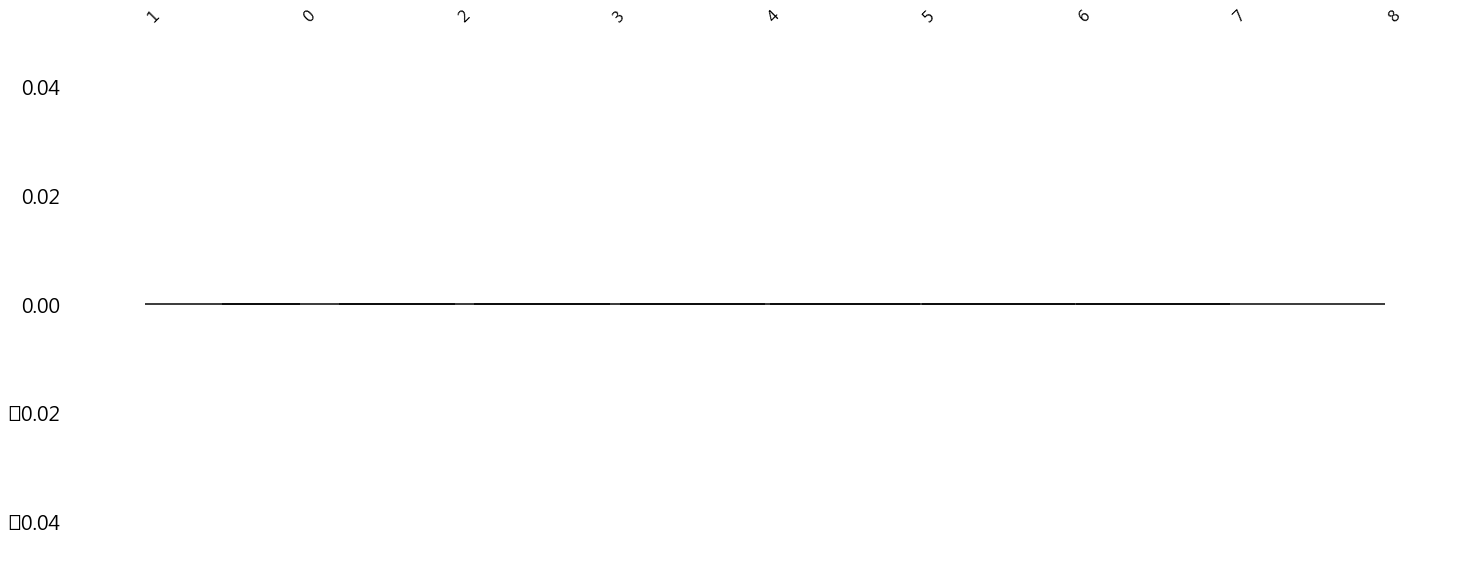

In [14]:
msno.dendrogram(data1)

In [233]:
data1=pd.read_csv(".\\hw2_data\\data1\\train_mid.csv",header=None)

In [272]:
data1_true=pd.read_csv(".\\hw2_data\\data7\\train.csv",header=None)
data1=pd.read_csv(".\\hw2_data\\data7\\train_forest.csv",header=None)
data1=pd.concat([data1,data1_true.iloc[:,-1]],axis=1)

In [273]:
from sklearn.impute import KNNImputer 
imputer = KNNImputer(n_neighbors=4,weights="distance") 
imputed_data1 = imputer.fit_transform(data1) 
data1 = pd.DataFrame(imputed_data1) 
data1.head()

,0,1,2,3,4,5,6
0,-2.3,0.568,4.7986,3.9474,3.1700,0.150000,0.27
1,-2.3,0.568,4.7800,3.9900,3.1700,0.200000,0.78
2,-2.3,0.568,4.7800,4.0171,3.1700,0.225000,1.18
3,-2.3,0.568,4.7800,3.9985,3.1700,0.214771,1.82
4,-2.3,0.568,4.7800,3.9900,3.1688,0.212521,3.76


In [274]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer(initial_strategy="most_frequent",estimator=KNeighborsRegressor(n_neighbors=3),max_iter=40)
imputed_data1 = imputer.fit_transform(data1) 
data1 = pd.DataFrame(imputed_data1) 
data1.head()

,0,1,2,3,4,5,6
0,-2.3,0.568,4.7986,3.9474,3.1700,0.150000,0.27
1,-2.3,0.568,4.7800,3.9900,3.1700,0.200000,0.78
2,-2.3,0.568,4.7800,4.0171,3.1700,0.225000,1.18
3,-2.3,0.568,4.7800,3.9985,3.1700,0.214771,1.82
4,-2.3,0.568,4.7800,3.9900,3.1688,0.212521,3.76


In [275]:
from sklearn.impute import SimpleImputer

# 模型建立

In [276]:
#切割資料，train:test=0.85:0.15
train_data,test_data,train_labels,test_labels=train_test_split(data1.iloc[:,0:6],data1.iloc[:,-1],test_size=0.15, random_state=69)
print('Size of training dataset:', train_data.shape)
print('Size of testing dataset:', test_data.shape)

Size of training dataset: (196, 6)
Size of testing dataset: (35, 6)


In [277]:
train_data

,0,1,2,3,4,5
109,-5.000000,0.565000,4.7704,3.9900,3.1500,0.400000
204,-5.000000,0.530000,4.7821,3.7500,3.1500,0.425000
112,-1.431655,0.565000,5.1000,3.8711,3.5100,0.125000
180,-5.000000,0.565559,4.7800,3.9837,3.1500,0.321400
209,-2.300000,0.600000,4.8694,4.1700,3.3190,0.225000
...,...,...,...,...,...,...
90,-1.955000,0.573500,4.7800,4.1300,3.1109,0.282265
107,-4.333667,0.565890,4.7700,3.9900,3.1526,0.325000
201,-5.000000,0.542010,4.7800,3.7500,3.1554,0.325000
203,-5.000000,0.533900,4.7864,3.7500,3.1500,0.400000


In [278]:
#from xgboost.sklearn import XGBClassifier

In [279]:
# Create the model
XGB = XGBRegressor(n_estimators=18,min_child_weight=5,subsample=0.88)

# Learn the digits on the train subset
XGB.fit(train_data, train_labels)

# Predict the value of the digit on the testing subset
predicted = XGB.predict(test_data)

# Calculate MSE/MAE
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
MSE= mean_squared_error(test_labels, predicted)
print('Mean_squared_error of testing dataset: ', MSE)
MAE= mean_absolute_error(test_labels, predicted)
print('Mean_absolute_error of testing dataset: ', MAE)

Mean_squared_error of testing dataset:  102.69547317934129
Mean_absolute_error of testing dataset:  5.4666346055609845


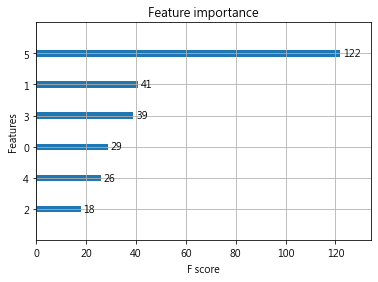

In [79]:
from xgboost import plot_importance
plot_importance(XGB)
plt.show()

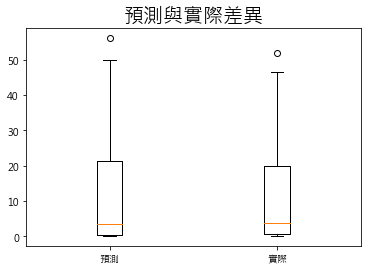

In [81]:
compare=[predicted,test_labels]

plt.boxplot(compare, labels= ['預測', '實際'])
plt.title("預測與實際差異",{"fontsize" : 20} )
plt.show()

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


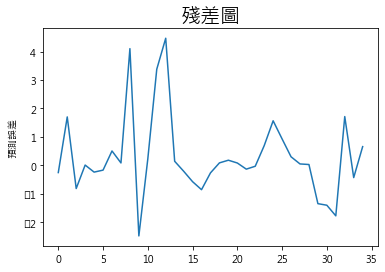

In [82]:
plt.plot([x for x in range(0,len(predicted-test_labels))],predicted-test_labels)
plt.ylabel("預測誤差")
plt.title("殘差圖",{"fontsize" : 20} )
plt.show()

In [84]:
data1_test=pd.read_csv(".\\hw2_data\\data7\\test_mid.csv",header=None)
#imputed_data1_test = imputer.fit_transform(data1_test) 
#data1_test = pd.DataFrame(imputed_data1_test) 
#data1_test = data1_test.drop(data1_test.columns[[11]], axis=1) 

In [85]:
data1_test.head()

,0,1,2,3,4,5
0,-2.30,0.5300,5.11,3.69,3.510,0.250
1,-1.82,0.5504,4.34,2.81,3.150,0.300
2,0.00,0.6000,4.78,4.24,3.150,0.275
3,-2.40,0.5740,4.36,3.96,2.760,0.325
4,-2.30,0.5300,4.76,3.68,3.186,0.360


In [86]:
predicted = XGB.predict(data1_test)

In [87]:
one=pd.concat([data1_test,pd.DataFrame(predicted)],axis=1)

In [88]:
one.head()

,0,1,2,3,4,5,0
0,-2.30,0.5300,5.11,3.69,3.510,0.250,2.058580
1,-1.82,0.5504,4.34,2.81,3.150,0.300,3.484516
2,0.00,0.6000,4.78,4.24,3.150,0.275,3.072097
3,-2.40,0.5740,4.36,3.96,2.760,0.325,5.834279
4,-2.30,0.5300,4.76,3.68,3.186,0.360,11.440763


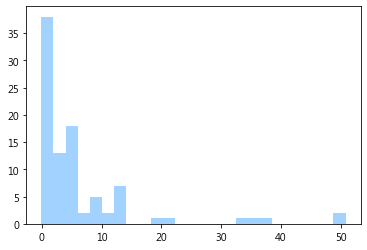

In [89]:
plt.hist(one.iloc[:,-1],bins=25,color="#A2D2FF")
plt.show()

In [90]:
one.to_csv(".\\xgboost\\mid_xgb_data7.csv",header=False, index=False)